# Scraping and processing rain data
This notebook scraps Meteosuisse rainfall data from a third-party website holding a database

In [119]:
from lxml import html
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
plt.rcParams.update({'font.size': 22})

## Scraping the data

In [15]:
Yr1 = pd.Series({'1': 0,
                      '2' : 0,
                      '3' : 0,
                      '4' : 0,
                      '5' : 0,
                      '6' : 0,
                      '7' : 0,
                    '8' : 0,
                '9' : 0,
                '10' : 0,
                '11' : 0,
                '12' : 0})
df1 = pd.DataFrame([Yr1], index=['0'])

In [19]:
for year in np.arange(2000,2020):
    Data = np.zeros((1,12))
    cnt = 0
    for month in np.arange(1,13):
        StrMth = str(month)
        if month < 10:
            StrMth = '0'+StrMth
            
        page = requests.get('https://www.prevision-meteo.ch/climat/journalier/geneve-cointrin/'+str(year)+'-'+StrMth)
        tree = html.fromstring(page.content)
        a = str(html.tostring(tree))
        b1 = a[a.find('Total'):-1]
        b2 = b1[b1.find('min'):-1]
        b3 = b2[b2.find('<td>')+4:b2.find('<td>')+8]
        if '<' in b3:
            b3 = b3[0:b3.find('<')]
        Data[0,cnt] = float(b3)
        cnt+=1
    Yr = pd.Series({'1': Data[0,0],
                      '2' : Data[0,1],
                      '3' : Data[0,2],
                      '4' : Data[0,3],
                      '5' : Data[0,4],
                      '6' : Data[0,5],
                      '7' : Data[0,6],
                    '8' : Data[0,7],
                    '9' : Data[0,8],
                    '10' : Data[0,9],
                    '11' : Data[0,10],
                    '12' : Data[0,11]})
    df =    pd.DataFrame([Yr], index=[str(year)])
    df1 = df1.append(df)
    print(year)
df1 = df1.drop('0')  




2019


## Processing the data

In [216]:
df1

1      2      3      4      5      6      7      8      9     10  \
2000   17.2   90.9   45.0   78.3   52.2   23.3  118.0  109.0  105.0  131.0   
2001  145.0   45.0  284.0  115.0   73.6  128.0  107.0   70.5   92.8   81.4   
2002   63.5   78.5   58.1   22.2  147.0   64.9  117.0   91.0   27.9   88.7   
2003   80.6   22.7   18.1   60.4   31.5   58.6   40.9  110.0   75.1  176.0   
2004  140.0   27.7   60.4   31.8   43.2   61.3   76.7  183.0   16.7  150.0   
2005   33.3   18.3   21.3   87.4   75.9   52.3   65.9   76.0   66.2   65.8   
2006   23.6   71.1  139.0  116.0   98.0   49.9   48.5  426.0   61.2  106.0   
2007   72.7  101.0   79.5   23.2  121.0  166.0  140.0  140.0   90.1   24.6   
2008   75.6   31.2   80.0  143.0   66.7   78.0   96.2   91.4  214.0   87.2   
2009   71.6   55.1   51.2   36.4   29.1   93.7   84.5   66.9   52.0   39.7   
2010   44.4   97.2   60.1   22.0  109.0   76.7    7.2   65.8   36.1   30.6   
2011   44.5   14.2   17.1   18.7   36.1   64.7  102.0   70.5   44.5   36.0   
2012   82.4    0.4   13.7  108.0   76.7   95.0   45.8   81.7   77.5   49.8   
2013   46.4   44.5   77.1  106.0  112.0   55.4  126.0   36.3   69.9  139.0   
2014   92.6  121.0   39.4   60.1   70.4   54.6  175.0   52.8   40.0  143.0   
2015   80.6   52.2   52.0   63.5   96.1   44.9   28.7   63.4  122.0   35.6   
2016  165.0   81.7   38.9   93.5   76.7  132.0   63.3   21.2   33.2   89.7   
2017   25.4   51.6   56.8   40.0   81.1   77.4   40.4   62.1   43.8   18.1   
2018  173.0   28.9  105.0   19.0   97.7   93.7   49.0   62.5   22.3   27.9   
2019   42.6   40.3   45.6   63.1   40.7  112.0   44.4   60.4   25.0  102.0   

         11     12  
2000  142.0   68.5  
2001   35.0   37.4  
2002  253.0   81.5  
2003   53.9   29.6  
2004   31.6   20.3  
2005   37.4   64.8  
2006  124.0   58.3  
2007   71.4   88.4  
2008   43.3  118.0  
2009  143.0  148.0  
2010  101.0   96.2  
2011   18.8  127.0  
2012  180.0  146.0  
2013  108.0  101.0  
2014  107.0   45.7  
2015   37.3   13.5  
2016   89.0    0.2  
2017   63.8  132.0  
2018   72.6  112.0  
2019  114.0  140.0

In [218]:
df1.to_csv(r'PrecipitationGVA_month.csv', index = True)
df2 = df1.copy()

In [215]:
df1.min(axis='columns')

2000    17.2
2001    35.0
2002    22.2
2003    18.1
2004    16.7
2005    18.3
2006    23.6
2007    23.2
2008    31.2
2009    29.1
2010     7.2
2011    14.2
2012     0.4
2013    36.3
2014    39.4
2015    13.5
2016     0.2
2017    18.1
2018    19.0
2019    25.0
dtype: float64

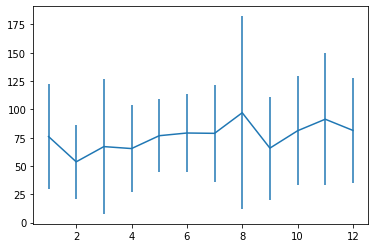

In [112]:
plt.errorbar(np.arange(1,13),df2.mean(axis='index'),df2.std(axis='index'))
plt.show()

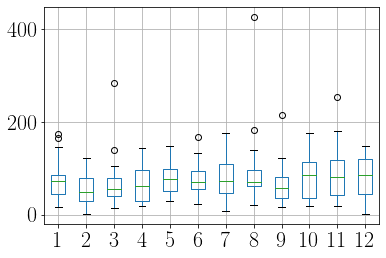

In [148]:
df2.boxplot(column=['1','2','3','4','5','6','7','8','9','10','11','12']);#, by = 'diagnosis');

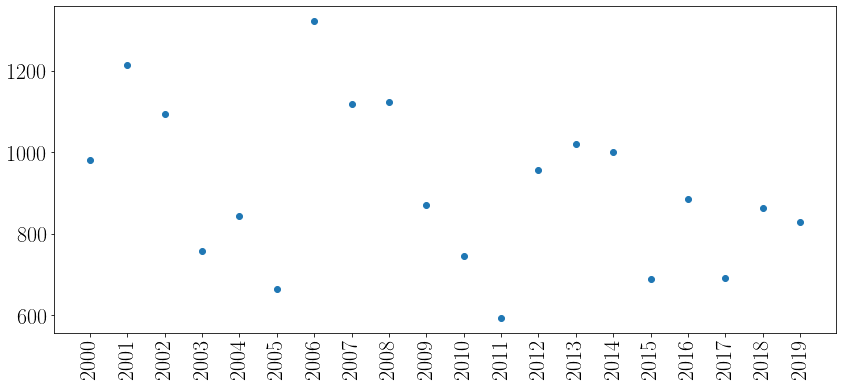

In [123]:
plt.figure(figsize=(14,6))
plt.plot(df2.sum(axis='columns'),'o')
plt.xticks(rotation='vertical')
plt.show()

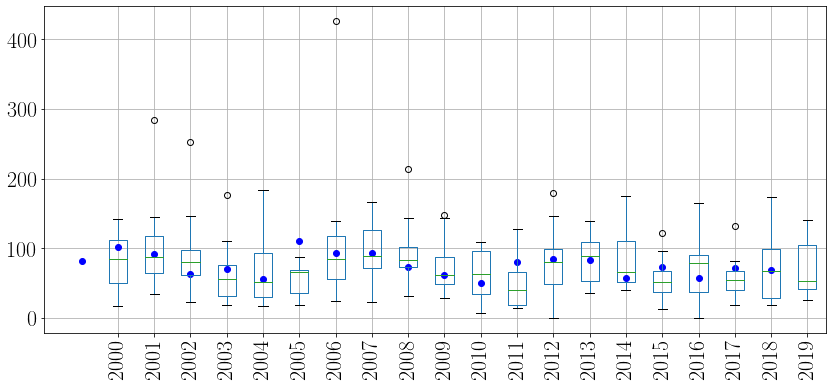

In [231]:
Str = []
for i in np.arange(0,len(df1.index)):
    Str.append(str(df1.index[i]))

plt.figure(figsize=(14,6))
plt.plot(df2.mean(axis='columns'),'bo')
df2.T.boxplot(column=Str);
plt.xticks(rotation='vertical')
plt.show()


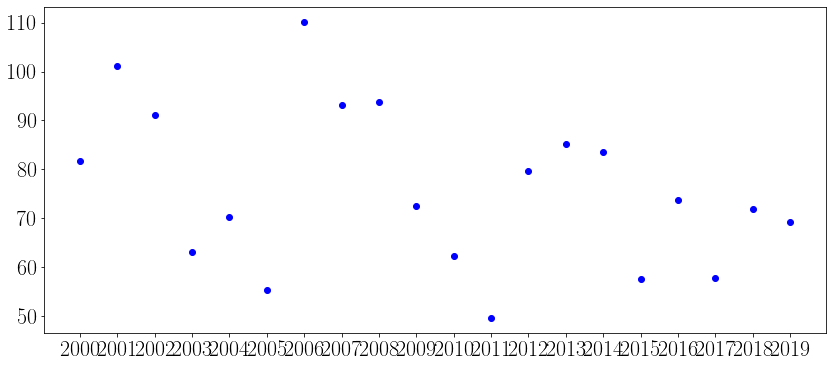

In [227]:
plt.figure(figsize=(14,6))
plt.plot(df2.mean(axis='columns'),'bo')
plt.show()